# Note -
##Feel Free to Run this notebook directly
##But kindly make a copy if you plan to update the notebook

## Install Packages

In [59]:
!pip install openai tiktoken

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Loading the Necessary Libraries

In [60]:
import openai
import tiktoken as tk

## Setting the api keys

In [61]:
openai.api_key = "0ff60fdc69c1448c9eb36afd2e13c084"
openai.api_base =  "https://jp-sandbox.openai.azure.com/"
openai.api_type = 'azure'
openai.api_version = '2023-03-15-preview'

In [62]:
gpt35 = 'gpt-35-turbo'
davinci = 'text-davinci-003'

## Calculate Tokens
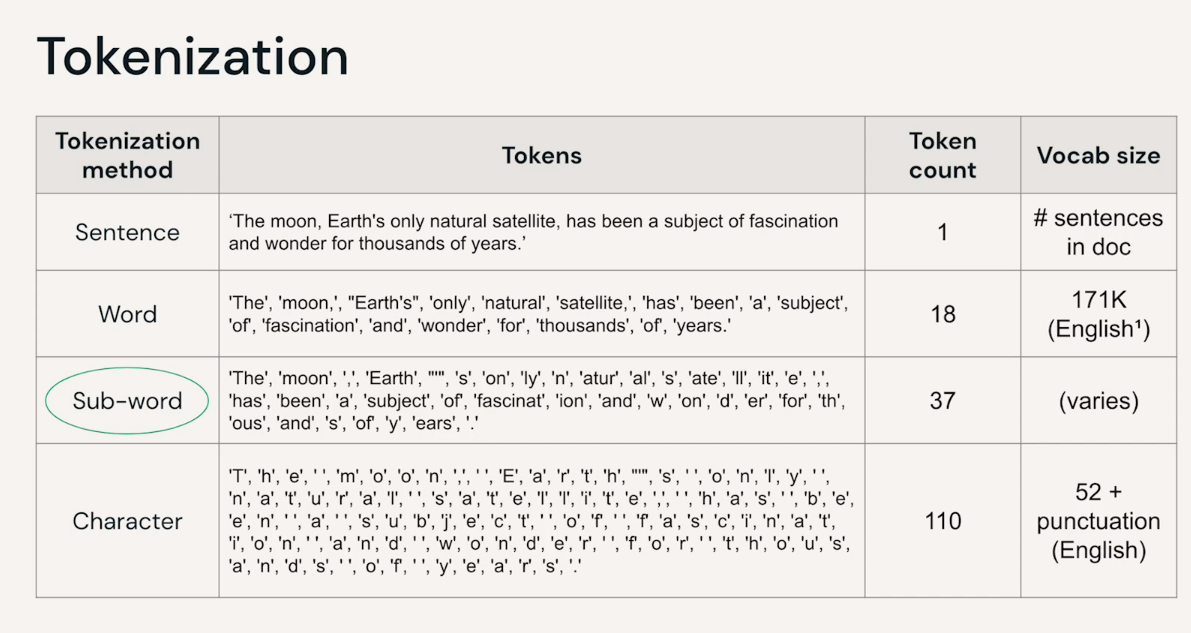

In [63]:
#Function to calculate number of tokens in Sentence
model = "gpt-3.5-turbo-0301"
encoding = tk.encoding_for_model(model)

In [64]:
sentence1 = "This is text"

In [65]:
# Num of words in the sentence
len(sentence1.split(" "))

3

In [8]:
# Number of words in token
len(encoding.encode(sentence1))

3

In [66]:
sentence2 = "In this paper, we discuss novel applications in finance, national security, health care, criminal justice, transportation, and smart cities, and address issues such as data access problems, algorithmic bias, AI ethics and transparency, and legal liability for AI decisions. We contrast the regulatory approaches of the U.S. and European Union, and close by making a number of recommendations for getting the most out of AI while still protecting important human values"

In [67]:
sentence2

'In this paper, we discuss novel applications in finance, national security, health care, criminal justice, transportation, and smart cities, and address issues such as data access problems, algorithmic bias, AI ethics and transparency, and legal liability for AI decisions. We contrast the regulatory approaches of the U.S. and European Union, and close by making a number of recommendations for getting the most out of AI while still protecting important human values'

In [68]:
len(sentence2.split(" "))

71

In [70]:
encoding.encode(sentence2)

[644,
 420,
 5684,
 11,
 584,
 4358,
 11775,
 8522,
 304,
 17452,
 11,
 5426,
 4868,
 11,
 2890,
 2512,
 11,
 9337,
 12437,
 11,
 18386,
 11,
 323,
 7941,
 9919,
 11,
 323,
 2686,
 4819,
 1778,
 439,
 828,
 2680,
 5435,
 11,
 12384,
 292,
 15837,
 11,
 15592,
 32008,
 323,
 28330,
 11,
 323,
 5897,
 24305,
 369,
 15592,
 11429,
 13,
 1226,
 13168,
 279,
 23331,
 20414,
 315,
 279,
 549,
 815,
 13,
 323,
 7665,
 9323,
 11,
 323,
 3345,
 555,
 3339,
 264,
 1396,
 315,
 19075,
 369,
 3794,
 279,
 1455,
 704,
 315,
 15592,
 1418,
 2103,
 22973,
 3062,
 3823,
 2819]

In [69]:
len(encoding.encode(sentence2))

86

## Loading the Models


### Davinci & GPT-3.5-turbo

In [13]:
prompt_1 = """generate a poem on Ganga river"""

In [71]:
response_1 = openai.Completion.create(engine='text-davinci-003', prompt=prompt_1, max_tokens=250)

In [72]:
response_1

<OpenAIObject text_completion id=cmpl-7RbGcAcKQ7P05tE2u3aGgR9uZPtfB at 0x7f62818fd990> JSON: {
  "id": "cmpl-7RbGcAcKQ7P05tE2u3aGgR9uZPtfB",
  "object": "text_completion",
  "created": 1686812466,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nNear the mountains, singing in a whisper\nGanga flows, by the grace of the great goddess\nBeloved by many and dear to all\n\nShe feeds the earth, and nourishes the souls\nFlora, fauna, and children of India\nAre blessed by her grace, evermore\n\nHer clean, crystal waters bring hope and joy\nHer waves like music, bring life in every way\nDeep above the clouds, her river never ends\nFrom the heights to sea, her story transcends\n\nFrom Rishikesh to Gangasagar\nHer waves stretch on and on\nA pious pilgrimage of faith and devotion\nGanga ma is forever beloved by us all",
      "index": 0,
      "finish_reason": "stop",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 142,
    "prompt_tokens": 8,
    "tot

## Parameters that helps to control Model's Response

**Reference Links**

* https://community.openai.com/t/cheat-sheet-mastering-temperature-and-top-p-in-chatgpt-api-a-few-tips-and-tricks-on-controlling-the-creativity-deterministic-output-of-prompt-responses/172683
* https://www.linkedin.com/pulse/text-generation-temperature-top-p-sampling-gpt-models-selvakumar/
* https://towardsdatascience.com/exploring-token-probabilities-as-a-means-to-filter-gpt-3s-answers-3e7dfc9ca0c
* https://forum.effectivealtruism.org/posts/aGmhi4uvAJptY8TA7/straightforwardly-eliciting-probabilities-from-gpt-3

### Prompt

In [16]:
prompt_tuning1 = """Summarize this -
Agent: Thank you for calling technical support. My name is John. How can I assist you today?

User: Hi John, I'm having trouble with my remote desktop. It keeps crashing whenever I try to connect to my work computer.

Agent: I'm sorry to hear that. Can you tell me a little more about the issue you're experiencing?

User: Sure. Whenever I try to connect to my work computer, the remote desktop window appears for a few seconds and then crashes. I've tried restarting my computer, but that didn't fix the problem.

Agent: Alright. It sounds like there might be an issue with your remote desktop client. Have you tried uninstalling and reinstalling it?

User: No, I haven't tried that yet. How do I do that?

Agent: Sure. First, you'll need to go to the Control Panel and then click on Programs and Features. From there, find the Remote Desktop client and right-click on it. Then, select Uninstall and follow the on-screen instructions. Once the client is uninstalled, you can download the latest version from Microsoft's website.

User: Okay, I'll try that. Do I need to restart my computer after installing the new version?

Agent: It's not necessary, but it's always a good idea to restart your computer after making any changes to ensure that everything is running smoothly. Also, make sure that your computer meets the minimum system requirements for the remote desktop client.

User: Alright, thanks for the advice. I'll give it a try and see if it fixes the problem.

Agent: You're welcome. If you have any further issues, don't hesitate to give us a call back. Is there anything else I can help you with today?

User: No, that's all for now. Thanks for your help, John.

Agent: Not a problem, have a great day!
"""

In [17]:
response_tuning1 = openai.Completion.create(engine='text-davinci-003', prompt=prompt_tuning1, max_tokens=250)

In [18]:
response_tuning1['choices'][0]['text'].strip()

'The user was having trouble with their remote desktop, so the agent suggested uninstalling and reinstalling the Remote Desktop client. The agent also advised the user to restart their computer and make sure that it meets the minimum system requirements for the client.'

In [19]:
prompt_tuning2 = """Your task is to generate detailed summary of dialouge conversation between customer supoort agent and user. Make sure keep track of all the troubleshooting steps. -
Agent: Thank you for calling technical support. My name is John. How can I assist you today?

User: Hi John, I'm having trouble with my remote desktop. It keeps crashing whenever I try to connect to my work computer.

Agent: I'm sorry to hear that. Can you tell me a little more about the issue you're experiencing?

User: Sure. Whenever I try to connect to my work computer, the remote desktop window appears for a few seconds and then crashes. I've tried restarting my computer, but that didn't fix the problem.

Agent: Alright. It sounds like there might be an issue with your remote desktop client. Have you tried uninstalling and reinstalling it?

User: No, I haven't tried that yet. How do I do that?

Agent: Sure. First, you'll need to go to the Control Panel and then click on Programs and Features. From there, find the Remote Desktop client and right-click on it. Then, select Uninstall and follow the on-screen instructions. Once the client is uninstalled, you can download the latest version from Microsoft's website.

User: Okay, I'll try that. Do I need to restart my computer after installing the new version?

Agent: It's not necessary, but it's always a good idea to restart your computer after making any changes to ensure that everything is running smoothly. Also, make sure that your computer meets the minimum system requirements for the remote desktop client.

User: Alright, thanks for the advice. I'll give it a try and see if it fixes the problem.

Agent: You're welcome. If you have any further issues, don't hesitate to give us a call back. Is there anything else I can help you with today?

User: No, that's all for now. Thanks for your help, John.

Agent: Not a problem, have a great day!
"""

In [20]:
response_tuning2 = openai.Completion.create(engine='text-davinci-003', prompt=prompt_tuning1, max_tokens=250)

In [21]:
response_tuning2['choices'][0]['text'].strip()

'The user was having trouble with their remote desktop, and the agent suggested uninstalling and reinstalling the client as well as making sure their computer met the minimum system requirements. The user thanked the agent for their help and the agent wished them a great day.'

### Engine

In [22]:
prompt_engine = "What is the capital of India?"

In [23]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_engine, max_tokens=250)

<OpenAIObject text_completion id=cmpl-7RZJuI068ck8XKoVvA3lIbc1fO3da at 0x7f628138ffb0> JSON: {
  "id": "cmpl-7RZJuI068ck8XKoVvA3lIbc1fO3da",
  "object": "text_completion",
  "created": 1686804982,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nThe capital of India is New Delhi.",
      "index": 0,
      "finish_reason": "stop",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 10,
    "prompt_tokens": 7,
    "total_tokens": 17
  }
}

In [24]:
openai.Completion.create(engine='text-davinci-002', prompt=prompt_engine, max_tokens=250)

<OpenAIObject text_completion id=cmpl-7RZJvXYsHDZhLXkio0n7AMwm5A4kj at 0x7f6281826020> JSON: {
  "id": "cmpl-7RZJvXYsHDZhLXkio0n7AMwm5A4kj",
  "object": "text_completion",
  "created": 1686804983,
  "model": "text-davinci-002",
  "choices": [
    {
      "text": "\n\nThe capital of India is New Delhi.",
      "index": 0,
      "finish_reason": "stop",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 10,
    "prompt_tokens": 7,
    "total_tokens": 17
  }
}

### Temperature

### Temperature = 1

#### For the tasks that require variety

In [73]:
prompt_temp = "Write a tagline for ice-creame shop "

In [76]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_temp, max_tokens=2500,temperature = 1)

<OpenAIObject text_completion id=cmpl-7RbTSUa3VGSF6Ruyj1aqVlBZIszTL at 0x7f628192ccc0> JSON: {
  "id": "cmpl-7RbTSUa3VGSF6Ruyj1aqVlBZIszTL",
  "object": "text_completion",
  "created": 1686813262,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\n\"Cool off with something sweet!\"",
      "index": 0,
      "finish_reason": "stop",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 9,
    "prompt_tokens": 11,
    "total_tokens": 20
  }
}

### Temperature = 0

Temperature: This parameter determines the creativity and diversity of the text generated by the GPT model. A higher temperature value (e.g., 1.5) leads to more diverse and creative text, while a lower value (e.g., 0.5) results in more focused and deterministic text.

Temperature:
* If the generated text is too random and lacks coherence, consider lowering the temperature value.
* If the generated text is too focused and repetitive, consider increasing the temperature value.

#### Tasks that require reliability, predictability

In [78]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_temp, max_tokens=2500,temperature = 0)

<OpenAIObject text_completion id=cmpl-7RbU5VDOvuROp75rlRvCOGTWk349p at 0x7f62818fcea0> JSON: {
  "id": "cmpl-7RbU5VDOvuROp75rlRvCOGTWk349p",
  "object": "text_completion",
  "created": 1686813301,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\n\"Cool down with our delicious ice-cream!\"",
      "index": 0,
      "finish_reason": "stop",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 12,
    "prompt_tokens": 11,
    "total_tokens": 23
  }
}

### Temperature = 0.5

In [80]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_temp, max_tokens=2500,temperature = 0.5)

<OpenAIObject text_completion id=cmpl-7RbUXYdMKi0pnWVFZqUocW092045P at 0x7f628192eb60> JSON: {
  "id": "cmpl-7RbUXYdMKi0pnWVFZqUocW092045P",
  "object": "text_completion",
  "created": 1686813329,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\n\"Cool down with the creamiest ice-cream around!\"",
      "index": 0,
      "finish_reason": "stop",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 15,
    "prompt_tokens": 11,
    "total_tokens": 26
  }
}

### Max-Tokens

In [29]:
prompt_max = "Write a poem of Python Programming. Use as much words as possible"

#### Max-token = 250

In [81]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_max, max_tokens=250,temperature = 0.5)

<OpenAIObject text_completion id=cmpl-7RbVaiRSQEopOWhfDTqkzSnrI3nc7 at 0x7f628192c900> JSON: {
  "id": "cmpl-7RbVaiRSQEopOWhfDTqkzSnrI3nc7",
  "object": "text_completion",
  "created": 1686813394,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nPython programming is a language of great power\nA language that can do almost anything in an hour\nIt can solve equations, create websites, and even make art\nA language that can do it all with a single start\n\nIt's a language of great flexibility and ease\nUsed to create applications and websites with ease\nIt's a language that's used for a variety of tasks\nFrom creating games to making complex apps\n\nPython programming is a language of great potential\nA language that can help you achieve great things\nIt can help you build websites, analyze data, and much more\nA language that can open up a world of possibilities galore\n\nPython programming is a language of great importance\nA language that can help you reach your 

#### Max tokens = 100

In [82]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_max, max_tokens=100,temperature = 0.5)

<OpenAIObject text_completion id=cmpl-7RbVwFIliXJv0NOw4mexeFgUflLoc at 0x7f62818fce50> JSON: {
  "id": "cmpl-7RbVwFIliXJv0NOw4mexeFgUflLoc",
  "object": "text_completion",
  "created": 1686813416,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nPython is a powerful programming language,\nThat's used to create amazing applications,\nIt's easy to learn and use,\nAnd it's rapidly gaining in popularity.\n\nIt's a great choice for data science,\nIt's also used for web development,\nAnd it's a favorite for game development,\nAnd for creating desktop applications.\n\nPython is an interpreted language,\nIt's cross-platform and open-source,\nIt's an ideal choice for scripting",
      "index": 0,
      "finish_reason": "length",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 100,
    "prompt_tokens": 13,
    "total_tokens": 113
  }
}

#### Max tokens = 50

In [83]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_max, max_tokens=50,temperature = 0.5)

<OpenAIObject text_completion id=cmpl-7RbWCgO6gkT3T5Qbe8lHRtdNYh8k3 at 0x7f62818fecf0> JSON: {
  "id": "cmpl-7RbWCgO6gkT3T5Qbe8lHRtdNYh8k3",
  "object": "text_completion",
  "created": 1686813432,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nPython programming is a language of power,\nA language that can make a developer cower,\nFor it has so much potential to explore,\nAnd so many features to learn more and more.\n\nIt's an easy language to",
      "index": 0,
      "finish_reason": "length",
      "logprobs": null
    }
  ],
  "usage": {
    "completion_tokens": 50,
    "prompt_tokens": 13,
    "total_tokens": 63
  }
}

### Top P

Top-p Sampling: This parameter maintains a balance between diversity and high-probability words by selecting tokens from the top-p most probable tokens whose collective probability mass is greater than or equal to a threshold p. It helps ensure that the output is both diverse and relevant to the given context.

Top-p Sampling:
* If the generated text is too narrow in scope and lacks diversity, consider
increasing the probability threshold (p).
* If the generated text is too diverse and includes irrelevant words, consider decreasing the probability threshold (p).

In [33]:
prompt_topP = "What is my favorite food "

In [34]:
openai.Completion.create?

logprobs - Include the log probabilities on the logprobs most likely tokens, as well the chosen tokens. For example, if logprobs is 5, the API will return a list of the 5 most likely tokens. The API will always return the logprob of the sampled token, so there may be up to logprobs+1 elements in the response.

In [35]:
#logprobs = 1
openai.Completion.create(engine='text-davinci-003', prompt=prompt_max, max_tokens=50,temperature = 0.5,top_p=.5,logprobs=1,echo=True)

<OpenAIObject text_completion id=cmpl-7RZK4w3U3PphlkCfpxKfzvlX8f9aq at 0x7f6281360540> JSON: {
  "id": "cmpl-7RZK4w3U3PphlkCfpxKfzvlX8f9aq",
  "object": "text_completion",
  "created": 1686804992,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "Write a poem of Python Programming. Use as much words as possible\n\nPython programming is a language of delight\nIt's a tool that's used to create and ignite\nFrom websites to apps, it's a versatile tool\nIt's a language that's easy to learn and use as a rule\n\nFrom",
      "index": 0,
      "finish_reason": "length",
      "logprobs": {
        "tokens": [
          "Write",
          " a",
          " poem",
          " of",
          " Python",
          " Programming",
          ".",
          " Use",
          " as",
          " much",
          " words",
          " as",
          " possible",
          "\n",
          "\n",
          "Python",
          " programming",
          " is",
          " a",
          " lang

In [36]:
#logprobs = 5 -> To see top 5 words model uses to pick the most likely word
responses_log5 = openai.Completion.create(engine='text-davinci-003', prompt=prompt_max, max_tokens=50,temperature = 0.5,top_p=.5,logprobs=5)
responses_log5

<OpenAIObject text_completion id=cmpl-7RZK522PZYWxqQf1F5ahRK58nT4qN at 0x7f628215f100> JSON: {
  "id": "cmpl-7RZK522PZYWxqQf1F5ahRK58nT4qN",
  "object": "text_completion",
  "created": 1686804993,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nPython is a language that's so divine\nIt's the language of choice for many of mine\nIt's a powerful tool that's easy to learn\nAnd it's used in many places, it's a language that's stern\n\n",
      "index": 0,
      "finish_reason": "length",
      "logprobs": {
        "tokens": [
          "\n",
          "\n",
          "Python",
          " is",
          " a",
          " language",
          " that",
          "'s",
          " so",
          " divine",
          "\n",
          "It",
          "'s",
          " the",
          " language",
          " of",
          " choice",
          " for",
          " many",
          " of",
          " mine",
          "\n",
          "It",
          "'s",
          " a",
   

In [37]:
responses_log5['choices'][0]['text']

"\n\nPython is a language that's so divine\nIt's the language of choice for many of mine\nIt's a powerful tool that's easy to learn\nAnd it's used in many places, it's a language that's stern\n\n"

## Completion vs ChatCompletion Method

### Completion

In [84]:
prompt_completion = """Write a poem for AI'"""

In [85]:
openai.Completion.create(engine='text-davinci-003', prompt=prompt_completion, max_tokens=2500)

<OpenAIObject text_completion id=cmpl-7RbdHSm1yELZ7VyIY767U4yXZYDHI at 0x7f62821ea700> JSON: {
  "id": "cmpl-7RbdHSm1yELZ7VyIY767U4yXZYDHI",
  "object": "text_completion",
  "created": 1686813871,
  "model": "text-davinci-003",
  "choices": [
    {
      "text": "\n\nFar away in time and space\nA hidden realm of intelligence\nThe future of technology awaits\n\nRobots, drones galore\nTasks laid out for AI\nLaser-sharp minds being born\n\nCreativity, curiosity, problem solving\nMachine learning and deep neural nets\nThe birth of a brave new world\n\nSolutions that bypass the laws of nature\nOccurrences made to be more efficient\nA perfectly tuned system of intelligence\n\nThe world is more interconnected than ever before\nAI powers the matrix, never felt before\nIt's a realm of possibilities, so complex and vast\n\nA future of robots is coming upon us\nFor AI shall show us a new world\nThe potential of machines, limitless!",
      "index": 0,
      "finish_reason": "stop",
      "logprob

### ChatCompletion
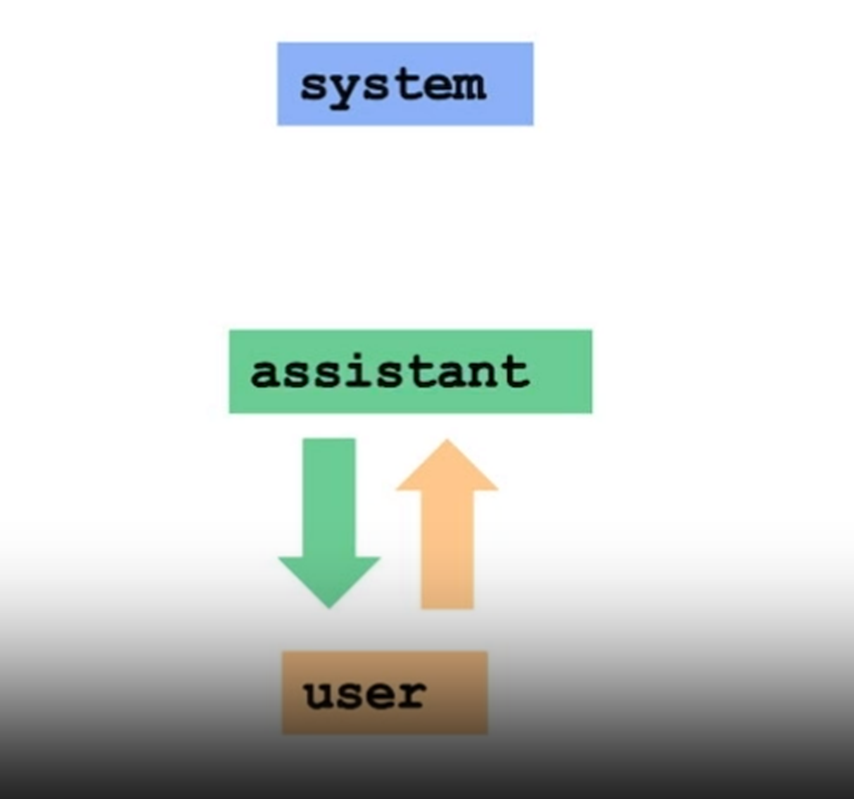



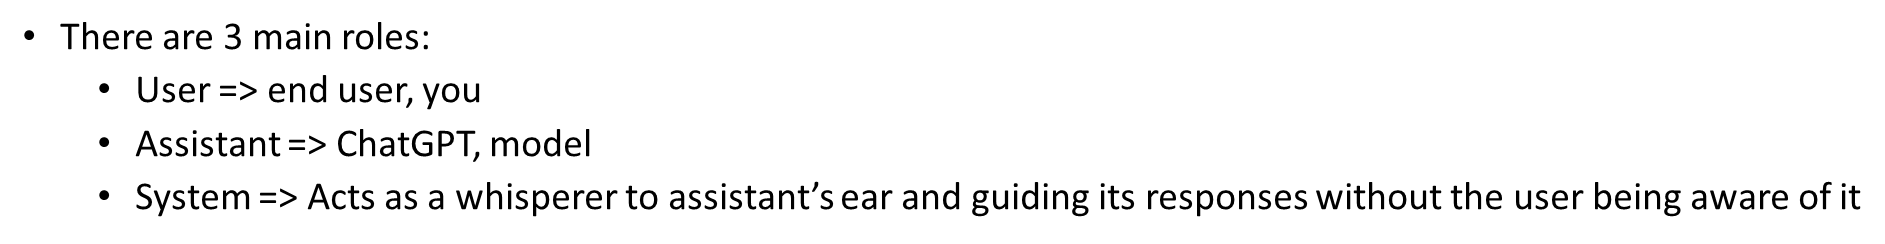

### Basic Prompt Example

In [41]:
message_basic = [
    {"role": "system", "content": "Assistant is a large language model trained by OpenAI."},
    {"role": "user", "content": "Who were the founders of Microsoft?"}
]

In [42]:
openai.ChatCompletion.create(engine=gpt35, messages=message_basic)

<OpenAIObject chat.completion id=chatcmpl-7RZKxiopwjr5tcJhlYCkC9A3ACz7O at 0x7f628192f470> JSON: {
  "id": "chatcmpl-7RZKxiopwjr5tcJhlYCkC9A3ACz7O",
  "object": "chat.completion",
  "created": 1686805047,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "Microsoft was founded by Bill Gates and Paul Allen on April 4, 1975."
      }
    }
  ],
  "usage": {
    "completion_tokens": 18,
    "prompt_tokens": 31,
    "total_tokens": 49
  }
}

### Example With Instructions

In [43]:
message_instruction1 = [{"role": "system", "content": """Assistant is an intelligent chatbot designed to help users answer their tax related questions.
Instructions:
- Only answer questions related to taxes.
- If you're unsure of an answer, you can say "I don't know" or "I'm not sure" and recommend users go to the IRS website for more information. """},
{"role": "user", "content": "When are my taxes due?"}]

In [44]:
openai.ChatCompletion.create(engine=gpt35, messages=message_instruction1)

<OpenAIObject chat.completion id=chatcmpl-7RZL1uHWCEhka7ESpLhxrUk67D3D9 at 0x7f628192fb00> JSON: {
  "id": "chatcmpl-7RZL1uHWCEhka7ESpLhxrUk67D3D9",
  "object": "chat.completion",
  "created": 1686805051,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "The deadline for filing taxes in the United States is typically April 15th. However, in some years the deadline may be later, especially if April 15th falls on a weekend or holiday. You should always check with the IRS website or a tax professional to confirm the deadline for the current year."
      }
    }
  ],
  "usage": {
    "completion_tokens": 61,
    "prompt_tokens": 85,
    "total_tokens": 146
  }
}

In [45]:
message_instruction2 = [{"role": "system", "content": """Assistant is an intelligent chatbot designed to help users answer their tax related questions.
Instructions:
- Only answer questions related to taxes.
- If you're unsure of an answer, you can say "I don't know" or "I'm not sure" and recommend users go to the IRS website for more information. """},
{"role": "user", "content": "What is the weather today?"}]

In [46]:
openai.ChatCompletion.create(engine=gpt35, messages=message_instruction2)

<OpenAIObject chat.completion id=chatcmpl-7RZL3W9GnrnS6hjK73e6H1yK7jm3R at 0x7f628192fd80> JSON: {
  "id": "chatcmpl-7RZL3W9GnrnS6hjK73e6H1yK7jm3R",
  "object": "chat.completion",
  "created": 1686805053,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "I'm sorry, I'm designed specifically to answer tax-related questions. I'm not equipped to provide current weather information. Is there anything tax-related you need help with?"
      }
    }
  ],
  "usage": {
    "completion_tokens": 34,
    "prompt_tokens": 85,
    "total_tokens": 119
  }
}

### Set the Context

In [86]:
message_context1 = [{"role": "system", "content": """Assistant is an intelligent chatbot designed to help users answer technical questions about Azure OpenAI Serivce. Only answer questions using the context below and if you're not sure of an answer, you can say 'I don't know'.

Context:
- Azure OpenAI Service provides REST API access to OpenAI's powerful language models including the GPT-3, Codex and Embeddings model series.
- Azure OpenAI Service gives customers advanced language AI with OpenAI GPT-3, Codex, and DALL-E models with the security and enterprise promise of Azure. Azure OpenAI co-develops the APIs with OpenAI, ensuring compatibility and a smooth transition from one to the other.
- At Microsoft, we're committed to the advancement of AI driven by principles that put people first. Microsoft has made significant investments to help guard against abuse and unintended harm, which includes requiring applicants to show well-defined use cases, incorporating Microsoft’s principles for responsible AI use."""
},
{"role": "user", "content": "What is Azure OpenAI Service?"}]

In [87]:
openai.ChatCompletion.create(engine=gpt35, messages=message_context1)

<OpenAIObject chat.completion id=chatcmpl-7Rbo3EYcLyWM6w42a1P06hgk6ZsD8 at 0x7f62818dabb0> JSON: {
  "id": "chatcmpl-7Rbo3EYcLyWM6w42a1P06hgk6ZsD8",
  "object": "chat.completion",
  "created": 1686814539,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "Azure OpenAI Service provides REST API access to OpenAI's powerful language models including the GPT-3, Codex and Embeddings model series. With Azure OpenAI Service, customers can leverage the advanced language AI of OpenAI while benefiting from the security and enterprise promise of Azure. The APIs are co-developed by Azure and OpenAI to ensure compatibility and a smooth transition from one to the other."
      }
    }
  ],
  "usage": {
    "completion_tokens": 81,
    "prompt_tokens": 213,
    "total_tokens": 294
  }
}

In [49]:
message_context2 = [{"role": "system", "content": """Assistant is an intelligent chatbot designed to help users answer technical questions about Azure OpenAI Serivce. Only answer questions using the context below and if you're not sure of an answer, you can say 'I don't know'.

Context:
- Azure OpenAI Service provides REST API access to OpenAI's powerful language models including the GPT-3, Codex and Embeddings model series.
- Azure OpenAI Service gives customers advanced language AI with OpenAI GPT-3, Codex, and DALL-E models with the security and enterprise promise of Azure. Azure OpenAI co-develops the APIs with OpenAI, ensuring compatibility and a smooth transition from one to the other.
- At Microsoft, we're committed to the advancement of AI driven by principles that put people first. Microsoft has made significant investments to help guard against abuse and unintended harm, which includes requiring applicants to show well-defined use cases, incorporating Microsoft’s principles for responsible AI use."""
},
{"role": "user", "content": "When is my tax due?"}]

In [50]:
openai.ChatCompletion.create(engine=gpt35, messages=message_context2)

<OpenAIObject chat.completion id=chatcmpl-7RZL7iIUbhZmX6aekjBOaR1v4Om0T at 0x7f6281957a10> JSON: {
  "id": "chatcmpl-7RZL7iIUbhZmX6aekjBOaR1v4Om0T",
  "object": "chat.completion",
  "created": 1686805057,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "I'm sorry but that question is not related to Azure OpenAI Service. As an AI language model, I cannot provide information about personal taxes. It's best to check with your local tax authority for details of your tax deadline. Is there something else related to Azure OpenAI Service you'd like to know?"
      }
    }
  ],
  "usage": {
    "completion_tokens": 62,
    "prompt_tokens": 212,
    "total_tokens": 274
  }
}

### Few shot Learning with Chat Completion

In [51]:
prompt_fewshot = [{"role": "system", "content": "Assistant is an intelligent chatbot designed to help users answer their tax related questions. "},
{"role": "user", "content": "When do I need to file my taxes by?"},
{"role": "assistant", "content": "In 2023, you will need to file your taxes by April 18th. The date falls after the usual April 15th deadline because April 15th falls on a Saturday in 2023. For more details, see https://www.irs.gov/filing/individuals/when-to-file."},
{"role": "user", "content": "How can I check the status of my tax refund?"},
{"role": "assistant", "content": "You can check the status of your tax refund by visiting https://www.irs.gov/refunds"},
{"role": "user", "content": "How can I calculate my annual tax?"}]

In [52]:
openai.ChatCompletion.create(engine=gpt35, messages=prompt_fewshot)

<OpenAIObject chat.completion id=chatcmpl-7RZL9th8G9SBPnmBcYMltA8JYOEgY at 0x7f62817b0fe0> JSON: {
  "id": "chatcmpl-7RZL9th8G9SBPnmBcYMltA8JYOEgY",
  "object": "chat.completion",
  "created": 1686805059,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "To calculate your annual tax, you will need to gather all the required tax information such as your income, expenses, deductions, and credits. \n\nHere are the general steps you should take:\n\n1. Determine your filing status: Single, Married Filing Jointly, Married Filing Separately, Head of Household, Qualifying widow(er).\n\n2. Calculate your gross income: Add up all of your income for the year, including wages, salaries, tips, business income, and investment income.\n\n3. Subtract adjustments to income: Adjustments to income are certain expenses you can deduct from your gross income, such as student loan interest, IRA 

### Using for Non-Chat Scenario

In [53]:
prompt_nonchat = [{"role": "system", "content": """You are an assistant designed to extract entities from text. Users will paste in a string of text and you will respond with entities you've extracted from the text as a JSON object. Here's an example of your output format:
{
   "name": "",
   "company": "",
   "phone_number": ""
}"""},
{"role": "user", "content": "Hello. My name is Robert Smith. I'm calling from Contoso Insurance, Delaware. My colleague mentioned that you are interested in learning about our comprehensive benefits policy. Could you give me a call back at (555) 346-9322 when you get a chance so we can go over the benefits?"}]

In [54]:
openai.ChatCompletion.create(engine=gpt35, messages=prompt_nonchat)

<OpenAIObject chat.completion id=chatcmpl-7RZLMO2JPr70gbo6CZosCToDeb7OZ at 0x7f628192c310> JSON: {
  "id": "chatcmpl-7RZLMO2JPr70gbo6CZosCToDeb7OZ",
  "object": "chat.completion",
  "created": 1686805072,
  "model": "gpt-35-turbo",
  "choices": [
    {
      "index": 0,
      "finish_reason": "stop",
      "message": {
        "role": "assistant",
        "content": "Sure! Based on the information you provided, here's the entities I have extracted:\n{\n   \"name\": \"Robert Smith\",\n   \"company\": \"Contoso Insurance\",\n   \"phone_number\": \"(555) 346-9322\"\n}"
      }
    }
  ],
  "usage": {
    "completion_tokens": 50,
    "prompt_tokens": 138,
    "total_tokens": 188
  }
}

## Manage Conversation

In [88]:
system_message = {"role": "system", "content": "You are a helpful assistant."}
max_response_tokens = 250
token_limit= 4096
conversation=[]
conversation.append(system_message)

In [89]:
def num_tokens_from_messages(messages, model="gpt-3.5-turbo-0301"):
    encoding = tk.encoding_for_model(model)
    num_tokens = 0
    for message in messages:
        num_tokens += 4  # every message follows <im_start>{role/name}\n{content}<im_end>\n
        for key, value in message.items():
            num_tokens += len(encoding.encode(value))
            if key == "name":  # if there's a name, the role is omitted
                num_tokens += -1  # role is always required and always 1 token
    num_tokens += 2  # every reply is primed with <im_start>assistant
    return num_tokens


In [90]:
def chatbot():
    """
    A function that simulates a chatbot conversation using OpenAI's GPT-3.5 language model.
    The function uses a while loop to keep accepting user input and generating responses
    until the program is terminated.
    """
    # Initialize an empty list to store the conversation history
    conversation = []
    # Begin the conversation loop
    while(True):
        # Get input from the user and add it to the conversation history
        user_input = input("")
        if user_input=='exit':
          break;
        conversation.append({"role": "user", "content": user_input})
        # Calculate the total number of tokens in the conversation history
        conv_history_tokens = num_tokens_from_messages(conversation)

        # If the total number of tokens is greater than or equal to the token limit,
        # remove the oldest message(s) until the total number of tokens is below the limit
        while (conv_history_tokens+max_response_tokens >= token_limit):
            del conversation[1]
            conv_history_tokens = num_tokens_from_messages(conversation)

        # Generate a response using OpenAI's GPT-3.5 language model
        response = openai.ChatCompletion.create(
            engine=gpt35, # The deployment name you chose when you deployed the ChatGPT or GPT-4 model.
            messages=conversation,
            temperature=.7,
            max_tokens=max_response_tokens,
        )

        # Add the generated response to the conversation history and print it
        conversation.append({"role": "assistant", "content": response['choices'][0]['message']['content']})
        print("\n" + response['choices'][0]['message']['content'] + "\n")
        print(f"The size of the conversation array is - {len(conversation)}")


In [ ]:
chatbot() #Enter 'exit' to terminate the loop


As an AI language model, I cannot reset passwords directly. However, here are some general steps you can follow to reset your password:

1. Go to the login page of the website or application.
2. Look for the "Forgot Password" or "Reset Password" option.
3. Follow the prompts to enter your email address or username associated with your account.
4. Check your email for instructions on how to reset your password.
5. Follow the steps in the email to reset your password.
6. Once you have reset your password, log in to your account with your new password.

If you are still having trouble resetting your password, you can reach out to the customer support team of the website or application for further assistance.

The size of the conversation array is - 2

To login to a website page, follow these general steps:

1. Open your web browser and go to the website you want to login to.
2. Look for the "Login" or "Sign In" button or link on the website's homepage.
3. Click on the "Login" or "Sign In